## Case Titanic

* #### Objetivo: Definir os objetivos da análise, como entender os fatores que influenciaram as taxas de sobrevivência no Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

### Integração dos Dados de Teste com "target": Mesclando df_test com df_target

In [ ]:
df_test = pd.read_csv('test.csv')
# Verificação do Tamanho do Dataset
tamanho_dataset = df_test.shape
print(f"\nTamanho do dataset mesclado: {tamanho_dataset[0]} linhas e {tamanho_dataset[1]} colunas.")

# Verificação dos Tipos de Dados
tipos_dados = df_test.dtypes
print("\nTipos de dados das colunas:")
print(tipos_dados)
df_test.info()
df_test.columns


Tamanho do dataset mesclado: 418 linhas e 11 colunas.

Tipos de dados das colunas:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df_target = pd.read_csv('gender_submission.csv')
# Verificação do Tamanho do Dataset
tamanho_dataset = df_target.shape
print(f"\nTamanho do dataset mesclado: {tamanho_dataset[0]} linhas e {tamanho_dataset[1]} colunas.")

# Verificação dos Tipos de Dados
tipos_dados = df_target.dtypes
print("\nTipos de dados das colunas:")
print(tipos_dados)
df_target.info()
df_target.columns


Tamanho do dataset mesclado: 418 linhas e 2 colunas.

Tipos de dados das colunas:
PassengerId    int64
Survived       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


Index(['PassengerId', 'Survived'], dtype='object')

In [ ]:
df_train = pd.read_csv('train.csv')
# Verificação do Tamanho do Dataset
tamanho_dataset = df_train.shape
print(f"\nTamanho do dataset mesclado: {tamanho_dataset[0]} linhas e {tamanho_dataset[1]} colunas.")

# Verificação dos Tipos de Dados
tipos_dados = df_train.dtypes
print("\nTipos de dados das colunas:")
print(tipos_dados)
df_train.info()
df_train.columns


Tamanho do dataset mesclado: 891 linhas e 12 colunas.

Tipos de dados das colunas:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin       

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_test = pd.read_csv('test.csv')

df_target = pd.read_csv('gender_submission.csv')

df_test = df_test.merge(df_target, on=["PassengerId"])
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [6]:
# Verificação do Tamanho do Dataset
tamanho_dataset = df_test.shape
print(f"\nTamanho do dataset mesclado: {tamanho_dataset[0]} linhas e {tamanho_dataset[1]} colunas.")

# Verificação dos Tipos de Dados
tipos_dados = df_test.dtypes
print("\nTipos de dados das colunas:")
print(tipos_dados)



Tamanho do dataset mesclado: 418 linhas e 12 colunas.

Tipos de dados das colunas:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object


### Reordenação e Padronização de Dados: Ajustando df_train para Correspondência com df_test

In [7]:
df_train = pd.read_csv('train.csv')
df_train.head()

# df_test e df_train 
# Defina a ordem das colunas baseada em df_test
colunas_ordenadas = df_test.columns

# Reordenar df_train para ter as colunas na mesma ordem que df_test
df_train_reordenado = df_train[colunas_ordenadas]

# Padronizar os tipos de dados das colunas
# Primeiro, obtenha os tipos de dados de df_test
tipos_df_test = df_test.dtypes

# Converta df_train para ter os mesmos tipos de dados
for coluna, tipo in tipos_df_test.items():
    if coluna in df_train_reordenado.columns:
        df_train_reordenado[coluna] = df_train_reordenado[coluna].astype(tipo)

# Verificar se df_train_reordenado agora tem as mesmas colunas e tipos de dados que df_test
if df_test.columns.equals(df_train_reordenado.columns) and df_test.dtypes.equals(df_train_reordenado.dtypes):
    print("df_train foi reordenado e padronizado com sucesso para coincidir com df_test.")
else:
    print("Houve um problema na reordenação ou padronização de df_train.")
    print("Colunas e tipos de df_test:")
    print(df_test.dtypes)
    print("Colunas e tipos de df_train_reordenado:")
    print(df_train_reordenado.dtypes)


df_train foi reordenado e padronizado com sucesso para coincidir com df_test.


### Concatenação dos DataFrames de Teste e Treinamento: União de df_test e df_train_reordenado

In [ ]:
df_concat = pd.concat([df_test, df_train_reordenado], ignore_index=True)
print("DataFrames concatenados após reordenar e padronizar as colunas.")
df_concat.head(2)

DataFrames concatenados após reordenar e padronizar as colunas.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [9]:
df_concat.shape

(1309, 12)

In [10]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### Limpeza e Pré-processamento dos Dados: Tratamento de Valores Nulos, Duplicatas e Ajustes no DataFrame df_concat

In [ ]:
# Verificar valores nulos
valores_nulos = df_concat.isnull().sum()

# Filtrar apenas as colunas com valores nulos e ordenar em ordem decrescente
colunas_com_nulos = valores_nulos[valores_nulos > 0].sort_values(ascending=False)

# Exibir o número de valores nulos por coluna
print("Número de valores nulos por coluna (ordenado):")
print(colunas_com_nulos)


# Verificar duplicatas
duplicatas = df_concat.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicatas}")
linhas_duplicadas = df_concat[df_concat.duplicated()]
print("Linhas duplicadas:")
print(linhas_duplicadas)

# Substituir valores NaN por moda
most_frequent_value = df_concat['Embarked'].mode()[0]
df_concat['Embarked'] = df_concat['Embarked'].fillna(most_frequent_value)

# Remoção da coluna "Cabin"
df_concat.drop(columns=['Cabin'], inplace=True)
df_concat.drop(columns=['PassengerId'], inplace=True)

# Preencher valores nulos com a mediana
mediana_age = df_concat['Age'].median()

df_concat['Age'] = df_concat['Age'].fillna(mediana_age)

# Converter a coluna 'Age' para inteiros
df_concat['Age'] = df_concat['Age'].astype(int)

# Preencher valores nulos com a mediana
mediana_age = df_concat['Fare'].median()

df_concat['Fare'] = df_concat['Fare'].fillna(mediana_age)

# Verificar valores nulos
valores_nulos = df_concat.isnull().sum()

# Verificar se há valores nulos e exibir a mensagem apropriada
if valores_nulos.sum() == 0:
    print("Não há valores nulos no DataFrame.")
else:
    print("Número de valores nulos por coluna:")
    # Filtrar apenas as colunas com valores nulos e ordenar em ordem decrescente
    colunas_com_nulos = valores_nulos[valores_nulos > 0].sort_values(ascending=False)
    print(colunas_com_nulos)
    total_nulos = valores_nulos.sum()
    print(f"\nTotal de valores nulos no DataFrame: {total_nulos}")

print("Forma de df_concat:", df_concat.shape, df_concat.columns)

df_concat.head(2)

Número de valores nulos por coluna (ordenado):
Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

Número de linhas duplicadas: 0
Linhas duplicadas:
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Survived]
Index: []
Não há valores nulos no DataFrame.
Forma de df_concat: (1309, 10) Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1


In [ ]:
# Verificação do Tamanho do Dataset
tamanho_dataset = df_concat.shape
print(f"\nTamanho do dataset mesclado: {tamanho_dataset[0]} linhas e {tamanho_dataset[1]} colunas.")

# Verificação dos Tipos de Dados
tipos_dados = df_concat.dtypes
print("\nTipos de dados das colunas:")
print(tipos_dados)
df_concat.info()
df_concat.columns


Tamanho do dataset mesclado: 1309 linhas e 10 colunas.

Tipos de dados das colunas:
Pclass        int64
Name         object
Sex          object
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Survived      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Survived  1309 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 102.4+ KB


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

# Análise Descritiva

### 1. Resumo Estatístico das Variáveis Numéricas:

Análise Estatística Descritiva das Variáveis Numéricas:

"Estatísticas Descritivas das Variáveis Numéricas: Média, Mediana, Desvio Padrão, Mínimos e Máximos"

Análise dos Percentis Adicionais:

"Distribuição dos Dados em Percentis: Análise Detalhada dos Percentis de 0% a 100%"


In [ ]:
# Obter estatísticas descritivas padrão
descricao = df_concat[['Pclass', 'Age', 'Fare']].describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 0.93, 0.95, 0.98, 0.99, 0.995, 0.996, 0.997, 0.998, 0.999])

print("Estatísticas Descritivas:")

print("\nPercentis de 0% a 100%:")
print(descricao)


Estatísticas Descritivas:

Percentis de 0% a 100%:
            Pclass          Age         Fare
count  1309.000000  1309.000000  1309.000000
mean      2.294882    29.484339    33.281086
std       0.837836    12.916721    51.741500
min       1.000000     0.000000     0.000000
25%       2.000000    22.000000     7.895800
50%       3.000000    28.000000    14.454200
75%       3.000000    35.000000    31.275000
85%       3.000000    42.000000    56.929200
90%       3.000000    48.000000    78.019980
93%       3.000000    51.000000    90.000000
95%       3.000000    55.000000   133.650000
98%       3.000000    61.840000   221.779200
99%       3.000000    64.000000   262.375000
99.5%     3.000000    70.000000   263.000000
99.6%     3.000000    70.000000   263.000000
99.7%     3.000000    71.000000   281.949019
99.8%     3.000000    72.152000   512.329200
99.9%     3.000000    75.384000   512.329200
max       3.000000    80.000000   512.329200


In [ ]:
# Obter estatísticas descritivas padrão
descricao = df_concat.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 0.93, 0.95, 0.98, 0.99, 0.995, 0.996, 0.997, 0.998, 0.999])

print("Estatísticas Descritivas:")

print("\nPercentis de 0% a 100%:")
pd.DataFrame(descricao)

Estatísticas Descritivas:

Percentis de 0% a 100%:


,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,29.484339,0.498854,0.385027,33.281086,0.377387
std,0.837836,12.916721,1.041658,0.865560,51.741500,0.484918
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000
85%,3.000000,42.000000,1.000000,1.000000,56.929200,1.000000
90%,3.000000,48.000000,1.000000,2.000000,78.019980,1.000000
93%,3.000000,51.000000,2.000000,2.000000,90.000000,1.000000


In [15]:
pd.set_option('display.max_rows', 150)
descricao

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,29.484339,0.498854,0.385027,33.281086,0.377387
std,0.837836,12.916721,1.041658,0.865560,51.741500,0.484918
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000
85%,3.000000,42.000000,1.000000,1.000000,56.929200,1.000000
90%,3.000000,48.000000,1.000000,2.000000,78.019980,1.000000
93%,3.000000,51.000000,2.000000,2.000000,90.000000,1.000000


In [16]:
percentis = np.linspace(0, 1, 101)  
print(percentis)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


### Análise Estatística dos Dados de Sobrevivência no Titanic

- Na análise dos dados de sobrevivência do Titanic, foram realizadas duas principais abordagens para descrever e compreender as características dos passageiros:

### Dados de Sobrevivência no Titanic

* ### Taxa Geral de Sobrevivência:

 - Aproximadamente 38% dos passageiros sobreviveram ao naufrágio.

Distribuição das Tarifas (Fare) e Idades (Age):

 - A maioria dos passageiros pagou tarifas baixas, com alguns pagando valores muito altos. A análise dos percentis revela uma grande variação nas tarifas.

 - A faixa etária varia de 0 a 80 anos, com concentração de passageiros jovens e presença significativa de idosos.
Fatores Influentes na Sobrevivência:

Classe Social (Pclass): 
 - Passageiros da primeira classe tiveram a maior taxa de sobrevivência, enquanto os da terceira classe tiveram a menor.

Tarifa (Fare): 
 - Passageiros que pagaram tarifas mais altas, associadas à primeira classe, apresentaram maior chance de sobrevivência.

Idade (Age):
 - Crianças e idosos tiveram taxas de sobrevivência mais altas, possivelmente devido a prioridade no resgate.

Presença de Familiares (SibSp e Parch): 
 - Passageiros acompanhados por familiares tiveram maior probabilidade de sobrevivência, possivelmente por suporte adicional durante a evacuação.

Conclusão:
Fatores como a classe social, a tarifa paga, a idade e a presença de familiares tiveram um impacto significativo na sobrevivência dos passageiros do Titanic. Passageiros de primeira classe, com tarifas mais altas, crianças e aqueles com familiares tiveram maior probabilidade de sobreviver.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecionar apenas as colunas de interesse
colunas_selecionadas = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_df = df_concat[colunas_selecionadas]

# Calcular desvio padrão, variância e amplitude
std_dev = numeric_df.std()
variance = numeric_df.var()
range_values = numeric_df.max() - numeric_df.min()

# Criar um DataFrame para as estatísticas
stats_df = pd.DataFrame({
    'Desvio Padrão': std_dev,
    'Variância': variance,
    'Amplitude': range_values
}).reset_index()

# Formatando os valores com 2 casas decimais
stats_df = stats_df.round(2)

# Exibir a tabela de estatísticas
print(stats_df)


   index  Desvio Padrão  Variância  Amplitude
0    Age          12.92     166.84      80.00
1  SibSp           1.04       1.09       8.00
2  Parch           0.87       0.75       9.00
3   Fare          51.74    2677.18     512.33


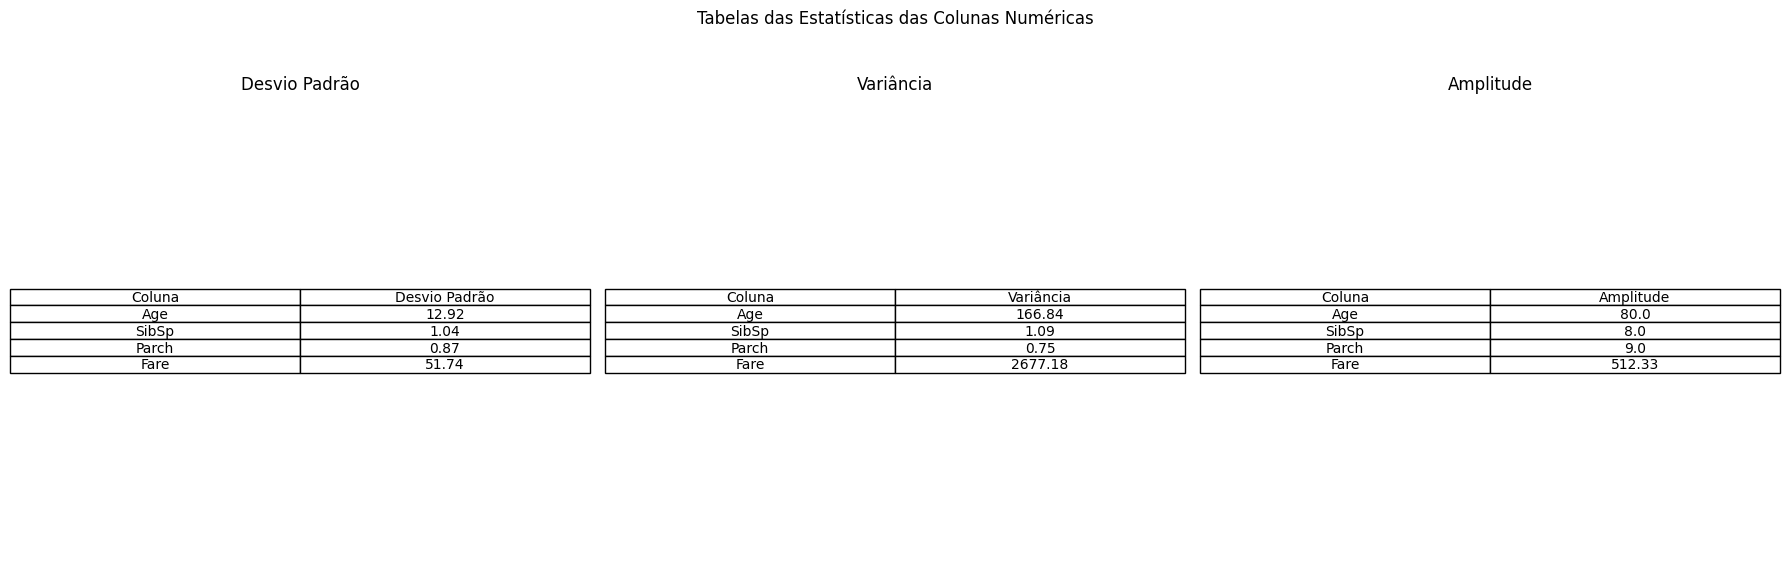

In [18]:
# Selecionar apenas as colunas de interesse
colunas_selecionadas = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_df = df_concat[colunas_selecionadas]

# Calcular desvio padrão, variância e amplitude
std_dev = numeric_df.std()
variance = numeric_df.var()
range_values = numeric_df.max() - numeric_df.min()

# Criar um DataFrame para as estatísticas
stats_df = pd.DataFrame({
    'Desvio Padrão': std_dev,
    'Variância': variance,
    'Amplitude': range_values
}).reset_index()

# Formatando os valores com 2 casas decimais
stats_df = stats_df.round(2)

# Criar a figura e os eixos para as tabelas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tabela para Desvio Padrão
axes[0].axis('tight')
axes[0].axis('off')
table_std = axes[0].table(cellText=stats_df[['index', 'Desvio Padrão']].values,
                         colLabels=['Coluna', 'Desvio Padrão'],
                         cellLoc='center',
                         loc='center')
axes[0].set_title('Desvio Padrão')

# Tabela para Variância
axes[1].axis('tight')
axes[1].axis('off')
table_var = axes[1].table(cellText=stats_df[['index', 'Variância']].values,
                         colLabels=['Coluna', 'Variância'],
                         cellLoc='center',
                         loc='center')
axes[1].set_title('Variância')

# Tabela para Amplitude
axes[2].axis('tight')
axes[2].axis('off')
table_range = axes[2].table(cellText=stats_df[['index', 'Amplitude']].values,
                           colLabels=['Coluna', 'Amplitude'],
                           cellLoc='center',
                           loc='center')
axes[2].set_title('Amplitude')

plt.suptitle('Tabelas das Estatísticas das Colunas Numéricas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


In [ ]:
# Calcular a curtose
curtose = df_concat.select_dtypes(include=[np.number]).kurtosis()

# Criar um DataFrame para a curtose
curtose_df = pd.DataFrame({
    'Curtose': curtose
}).reset_index()
curtose_df.columns = ['Coluna', 'Curtose']
curtose_df

,Coluna,Curtose
0,Pclass,-1.315079
1,Age,0.975223
2,SibSp,20.043251
3,Parch,21.541079
4,Fare,27.049667
5,Survived,-1.746150


* ### Resumo

- A curtose ajuda a identificar a forma da distribuição dos dados. 

Curtose Alta: Para variáveis como SibSp (número de irmãos/cônjuges), Parch (número de pais/filhos) e Fare (tarifa paga), a distribuição tem picos acentuados e caudas longas. Isso significa que há muitos valores extremos ou outliers (valores muito altos ou muito baixos).

Curtose Baixa: Para variáveis como PassengerId (ID do passageiro), Pclass (classe do passageiro) e Survived (sobrevivência), a distribuição é mais uniforme e não tem tantos valores extremos. Isso mostra que os dados estão mais espalhados e não têm muitos valores extremos ou concentrados.

* ### Conclusão

Analisar a curtose pode fornecer insights adicionais sobre a distribuição das variáveis contínuas no conjunto de dados do Titanic. Isso pode ser útil para entender se as variáveis têm caudas pesadas, o que pode impactar a análise de sobrevivência e a construção de modelos preditivos. As visualizações gráficas e tabelares ajudam a interpretar essas características de maneira clara e informativa.

### 2. Distribuição das Variáveis Categóricas:

* Contagem e gráfico de cada classe do passeiro, gênero, porto de embarque e sobreviventes e não sobreviventes.

### Contagem de Variáveis Categóricas ###

**Contagem de Gênero (Sex):**
male      843
female    466
Name: Sex, dtype: int64

**Contagem de Portos de Embarque (Embarked):**
S    916
C    270
Q    123
Name: Embarked, dtype: int64

**Contagem de Sobrevivência (Survived):**
0    815
1    494
Name: Survived, dtype: int64

**Classe do Passageiro (Pclass):**
3    709
1    323
2    277
Name: Pclass, dtype: int64
### Contagem de Variáveis Categóricas ###


/tmp/ipykernel_2150/3983028851.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_concat, x='Sex', palette='viridis', ax=axes[0, 0])
/tmp/ipykernel_2150/3983028851.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Masculino', 'Feminino'])
/tmp/ipykernel_2150/3983028851.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_concat, x='Embarked', palette='viridis', ax=axes[0, 1])
/tmp/ipykernel_2150/3983028851.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].se

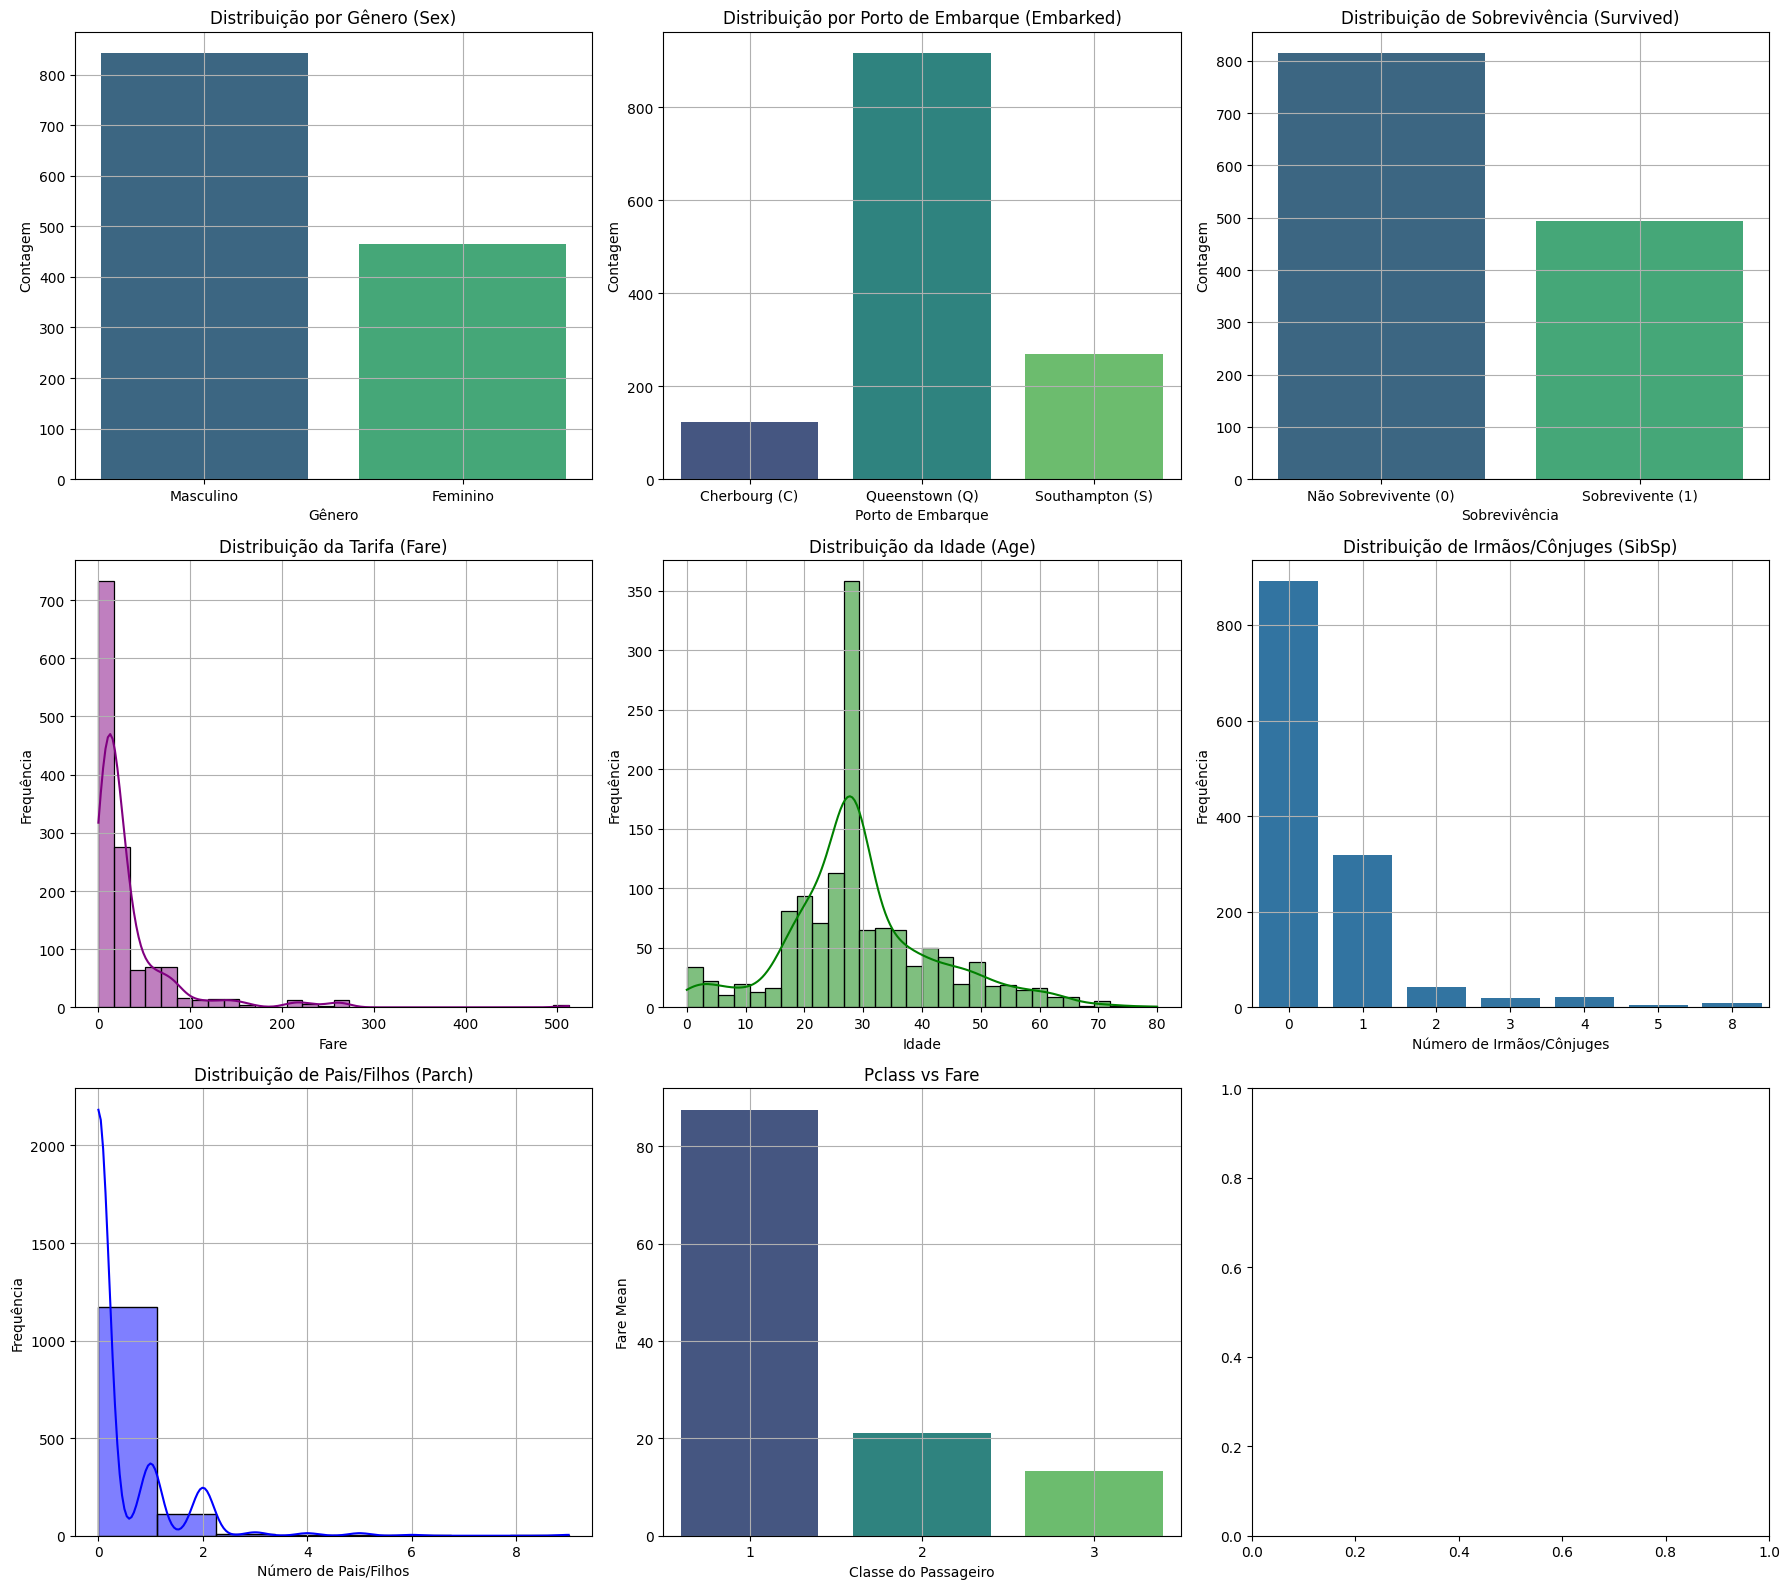

In [20]:
# Contagem das variáveis categóricas
sex_counts = df_concat['Sex'].value_counts()
embarked_counts = df_concat['Embarked'].value_counts()
survived_counts = df_concat['Survived'].value_counts()
pclass_counts = df_concat['Pclass'].value_counts()
ticket_counts = df_concat['Ticket'].value_counts()

# Impressão das contagens
print("### Contagem de Variáveis Categóricas ###")

print("\n**Contagem de Gênero (Sex):**")
print(sex_counts)

print("\n**Contagem de Portos de Embarque (Embarked):**")
print(embarked_counts)

print("\n**Contagem de Sobrevivência (Survived):**")
print(survived_counts)

print("\n**Classe do Passageiro (Pclass):**")
print(pclass_counts)

print("### Contagem de Variáveis Categóricas ###")

# Gráficos de Variáveis Categóricas e Numéricas
fig, axes = plt.subplots(3, 3, figsize=(18, 16))

# 1. Gráfico da contagem de gêneros (Sex)
sns.countplot(data=df_concat, x='Sex', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição por Gênero (Sex)')
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].set_ylabel('Contagem')
axes[0, 0].set_xticklabels(['Masculino', 'Feminino'])
axes[0, 0].grid(True) 

# 2. Gráfico da contagem de portos de embarque (Embarked)
sns.countplot(data=df_concat, x='Embarked', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição por Porto de Embarque (Embarked)')
axes[0, 1].set_xlabel('Porto de Embarque')
axes[0, 1].set_ylabel('Contagem')
axes[0, 1].set_xticklabels(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
axes[0, 1].grid(True)  

# 3. Gráfico da contagem de sobreviventes (Survived)
sns.countplot(data=df_concat, x='Survived', palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Distribuição de Sobrevivência (Survived)')
axes[0, 2].set_xlabel('Sobrevivência')
axes[0, 2].set_ylabel('Contagem')
axes[0, 2].set_xticklabels(['Não Sobrevivente (0)', 'Sobrevivente (1)'])
axes[0, 2].grid(True)  

# 4. Histograma de Fare
sns.histplot(df_concat['Fare'], bins=30, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição da Tarifa (Fare)')
axes[1, 0].set_xlabel('Fare')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].grid(True)  

# 5. Histograma de Idade (Age)
sns.histplot(df_concat['Age'].dropna(), bins=30, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribuição da Idade (Age)')
axes[1, 1].set_xlabel('Idade')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].grid(True)  

# 6. Distribuição de Irmãos/Cônjuges (SibSp)
sns.barplot(x=df_concat['SibSp'].value_counts().index, y=df_concat['SibSp'].value_counts().values, ax=axes[1, 2])
axes[1, 2].set_title('Distribuição de Irmãos/Cônjuges (SibSp)')
axes[1, 2].set_xlabel('Número de Irmãos/Cônjuges')
axes[1, 2].set_ylabel('Frequência')
axes[1, 2].grid(True)  

# 7. Histograma de Número de Pais/Filhos (Parch)
sns.histplot(df_concat['Parch'], bins=8, kde=True, color='blue', ax=axes[2, 0])
axes[2, 0].set_title('Distribuição de Pais/Filhos (Parch)')
axes[2, 0].set_xlabel('Número de Pais/Filhos')
axes[2, 0].set_ylabel('Frequência')
axes[2, 0].grid(True) 

# 8. Gráfico para Pclass e Fare
df_mean_fare = df_concat.groupby('Pclass')['Fare'].mean().reset_index()
sns.barplot(data=df_mean_fare, x='Pclass', y='Fare', palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Pclass vs Fare')
axes[2, 1].set_xlabel('Classe do Passageiro')
axes[2, 1].set_ylabel('Fare Mean')
axes[2, 1].grid(True) 

# Ajustar layout para evitar gráficos em branco e sobrepostos
plt.tight_layout()

# Mostrar gráficos
plt.show()


 box plox por categoria de class 1,2,3

      Fare  Pclass
0   7.2292       3
1   7.7500       3
2   7.7750       3
3   7.8958       3
4   7.9250       3
5   8.0500       3
6  10.5000       2
7  13.0000       2
8  26.0000       2
9  26.5500       1


<Figure size 1400x800 with 0 Axes>

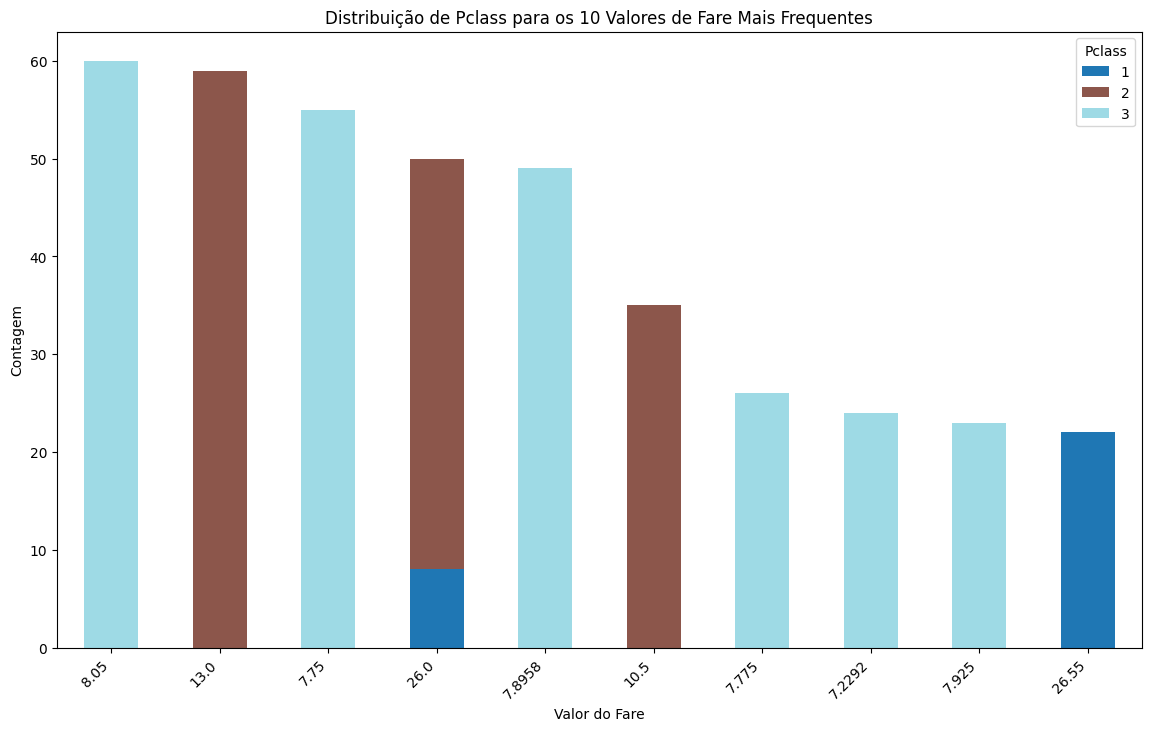

In [21]:
# Passo 1: Contar a frequência dos valores de Fare
fare_counts = df_concat['Fare'].value_counts()

# Passo 2: Obter os 10 valores de Fare mais frequentes
top_10_fares = fare_counts.head(10).index

# Passo 3: Filtrar o DataFrame para incluir apenas esses 10 valores de Fare
filtered_df = df_concat[df_concat['Fare'].isin(top_10_fares)]

# Passo 4: Obter a relação entre os valores de Fare e a Pclass
fare_pclass_relation = filtered_df.groupby('Fare')['Pclass'].agg(pd.Series.mode).reset_index()
print(fare_pclass_relation)

# Passo 5: Preparar os dados para o gráfico
# Contar quantas vezes cada Pclass aparece para cada Fare
fare_pclass_counts = filtered_df.groupby(['Fare', 'Pclass']).size().unstack(fill_value=0)

# Obter os dados para plotar
fare_pclass_counts = fare_pclass_counts.loc[top_10_fares]

# Criar o gráfico
plt.figure(figsize=(14, 8))
fare_pclass_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Distribuição de Pclass para os 10 Valores de Fare Mais Frequentes')
plt.xlabel('Valor do Fare')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pclass')
plt.show()


## Análise Diagnóstica

### 1. Correlação entre Variáveis:
* Investigar a correlação entre variáveis numéricas, como Age, SibSp, Parch, Fare e Survived.

/tmp/ipykernel_2150/4089641958.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_concat[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived','Sex']].corr()


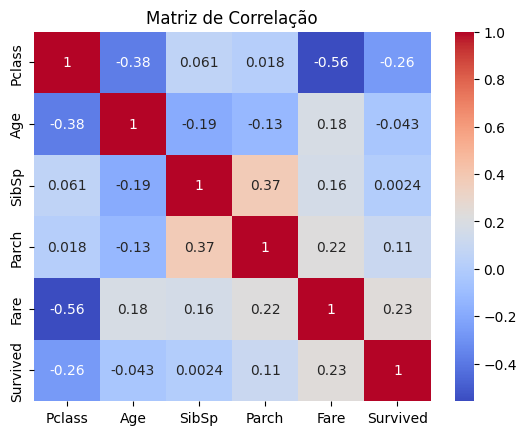

In [22]:
# Variáveis Numéricas
correlation_matrix = df_concat[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived','Sex']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### * 2.1 Análise de Boxplot
Boxplots para visualizar como a distribuição de uma variável numérica varia com diferentes categorias de uma variável categórica.

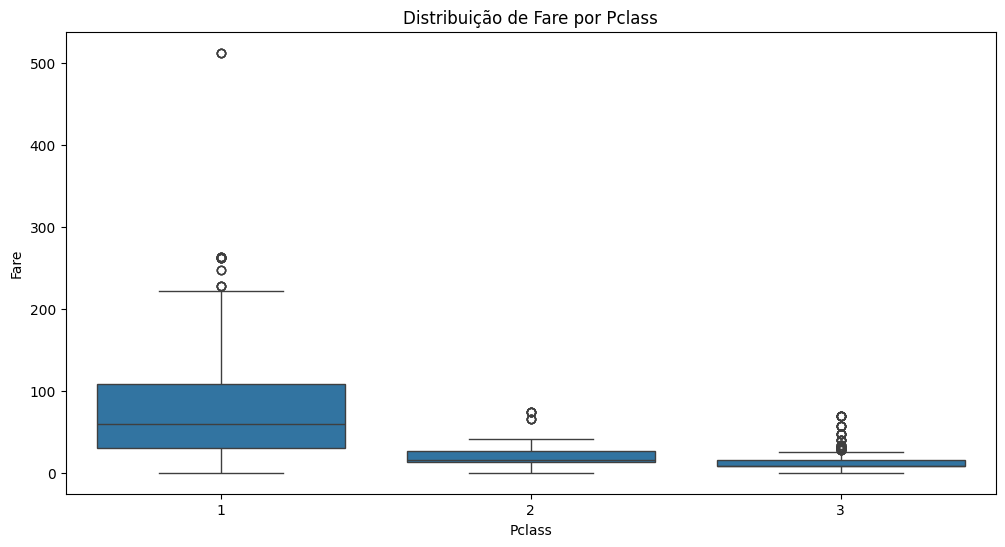

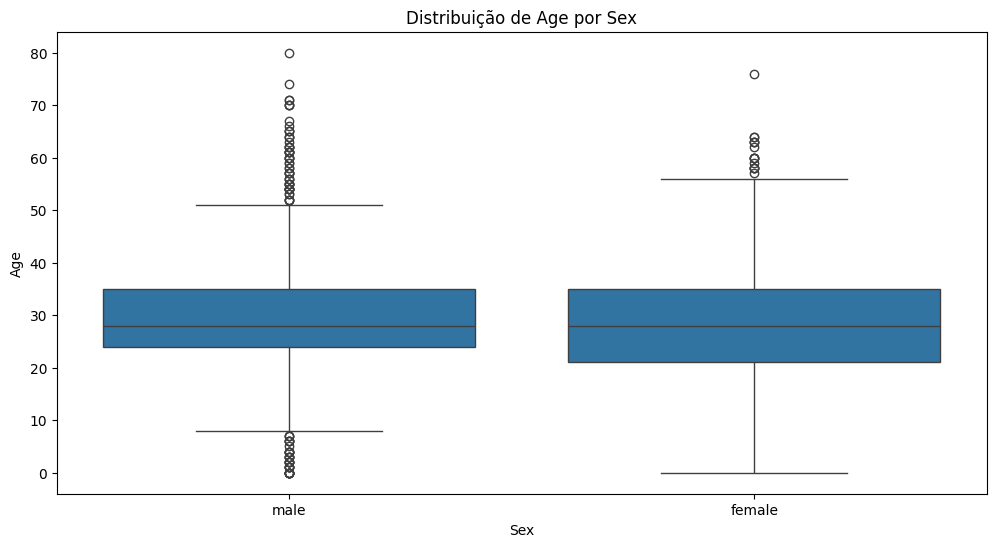

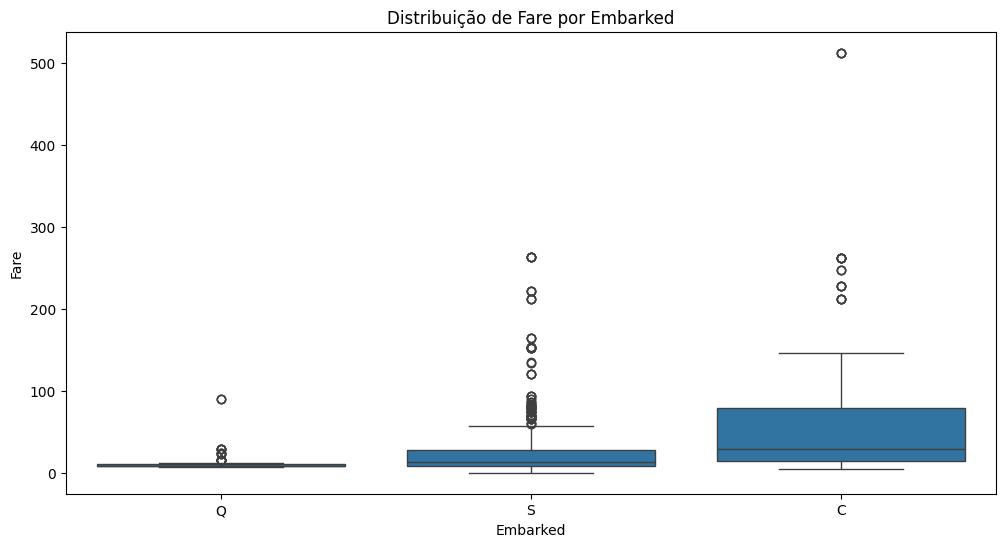

In [23]:
# Exemplo: Boxplot de Fare por Pclass
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df_concat)
plt.title('Distribuição de Fare por Pclass')
plt.show()

# Exemplo: Boxplot de Age por Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Age', data=df_concat)
plt.title('Distribuição de Age por Sex')
plt.show()

# Exemplo: Boxplot de Fare por Embarked
plt.figure(figsize=(12, 6))
sns.boxplot(x='Embarked', y='Fare', data=df_concat)
plt.title('Distribuição de Fare por Embarked')
plt.show()

### * 2.2 Análise de Média por Categoria
Calcular a média ou mediana de variáveis numéricas para diferentes categorias de variáveis categóricas pode fornecer insights sobre as diferenças médias.

In [24]:
# Média de Fare por Pclass
mean_fare_by_pclass = df_concat.groupby('Pclass')['Fare'].mean()
print("Média de Fare por Pclass:")
print(mean_fare_by_pclass)

# Média de Age por Sex
mean_age_by_sex = df_concat.groupby('Sex')['Age'].mean()
print("Média de Age por Sex:")
print(mean_age_by_sex)


Média de Fare por Pclass:
Pclass
1    87.508992
2    21.179196
3    13.304513
Name: Fare, dtype: float64
Média de Age por Sex:
Sex
female    28.562232
male      29.994069
Name: Age, dtype: float64


### 3. Correlações entre Variáveis Categóricas
Para variáveis categóricas, você pode analisar a relação entre diferentes variáveis usando tabelas de contingência e medidas de associação.

3.1 Tabelas de Contingência

Criar tabelas de contingência para analisar como as categorias de uma variável se distribuem em relação às categorias de outra variável.

In [25]:
# Tabela de contingência entre Sex e Survived
contingency_sex_survived = pd.crosstab(df_concat['Sex'], df_concat['Survived'])
print("Tabela de Contingência entre Sex e Survived:")
print(contingency_sex_survived)

# Tabela de contingência entre Pclass e Embarked
contingency_pclass_embarked = pd.crosstab(df_concat['Pclass'], df_concat['Embarked'])
print("Tabela de Contingência entre Pclass e Embarked:")
print(contingency_pclass_embarked)


Tabela de Contingência entre Sex e Survived:
Survived    0    1
Sex               
female     81  385
male      734  109
Tabela de Contingência entre Pclass e Embarked:
Embarked    C    Q    S
Pclass                 
1         141    3  179
2          28    7  242
3         101  113  495


### 3.2 Análise Gráfica
Usar gráficos de barras ou gráficos de barras empilhadas para visualizar a distribuição conjunta das variáveis categóricas.

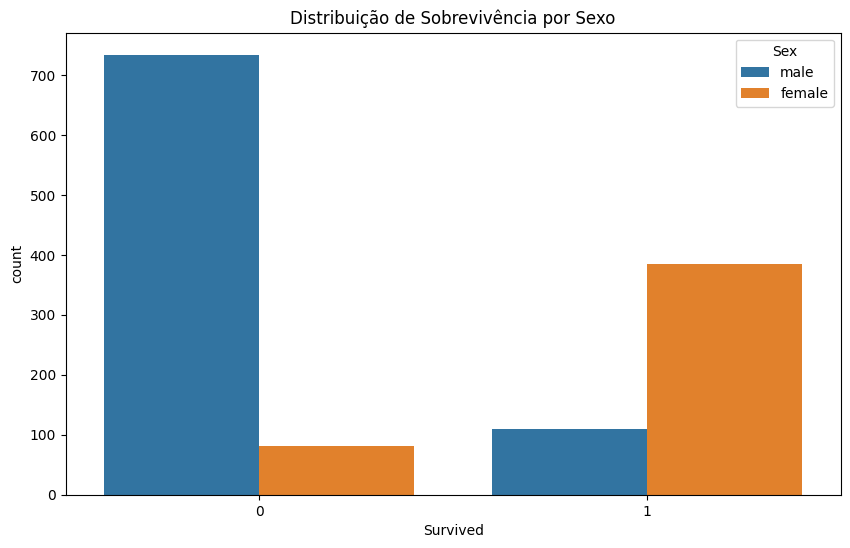

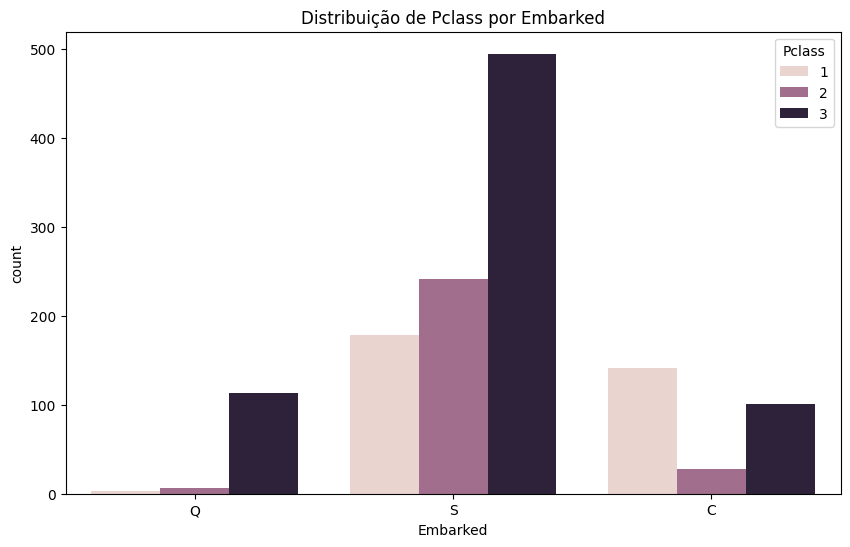

In [26]:
# Gráfico de barras para a relação entre Sex e Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df_concat)
plt.title('Distribuição de Sobrevivência por Sexo')
plt.show()

# Gráfico de barras para a relação entre Embarked e Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Pclass', data=df_concat)
plt.title('Distribuição de Pclass por Embarked')
plt.show()


### 1. Distribuição de Idade por Classe e Sexo

Um gráfico de barras que mostra a distribuição da idade média por classe, separado por sexo.

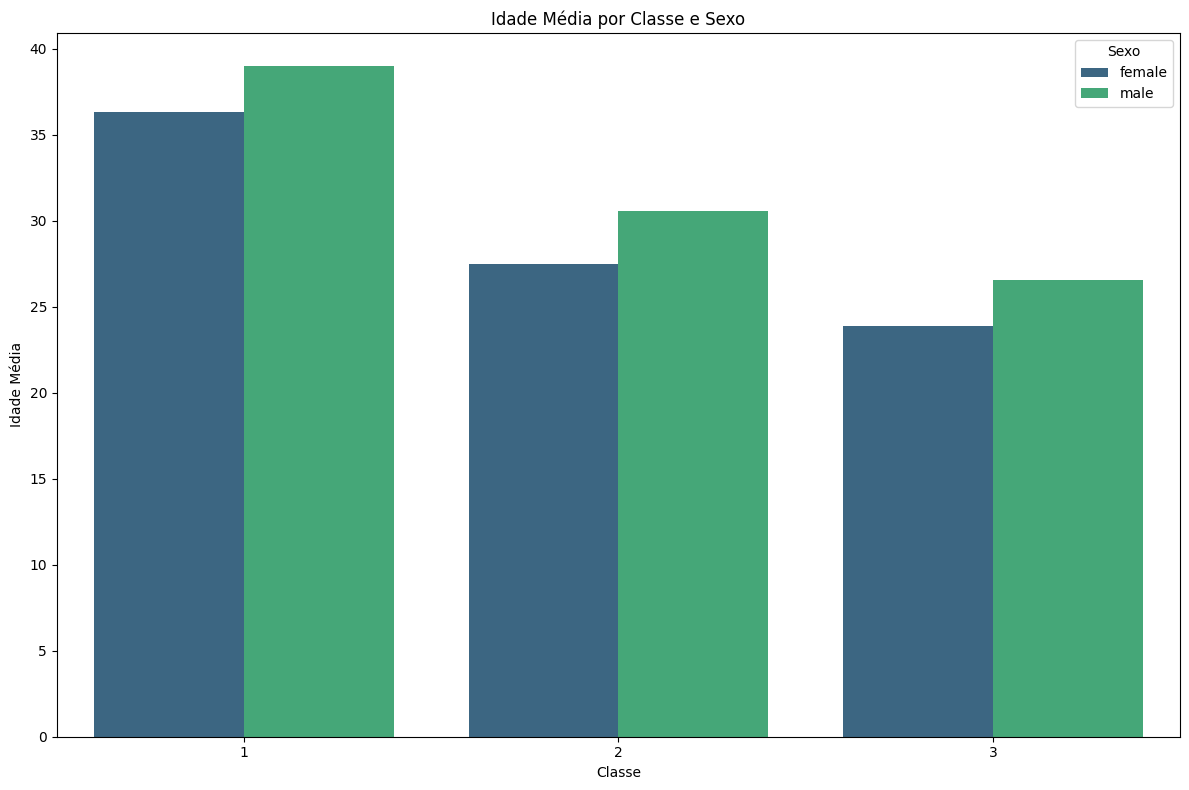

In [27]:
# Calcular a idade média por classe e sexo
age_distribution = df_concat.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Gráfico de barras
sns.barplot(
    x='Pclass',
    y='Age',
    hue='Sex',
    data=age_distribution,
    palette='viridis'
)

plt.title('Idade Média por Classe e Sexo')
plt.xlabel('Classe')
plt.ylabel('Idade Média')
plt.legend(title='Sexo')
plt.tight_layout()

plt.show()


### 2. Distribuição de Sobrevivência por Faixa Etária e Classe
Para analisar a sobrevivência em diferentes faixas etárias e classes, você pode criar um gráfico de barras que mostra a taxa de sobrevivência em diferentes faixas etárias, agrupadas por classe.

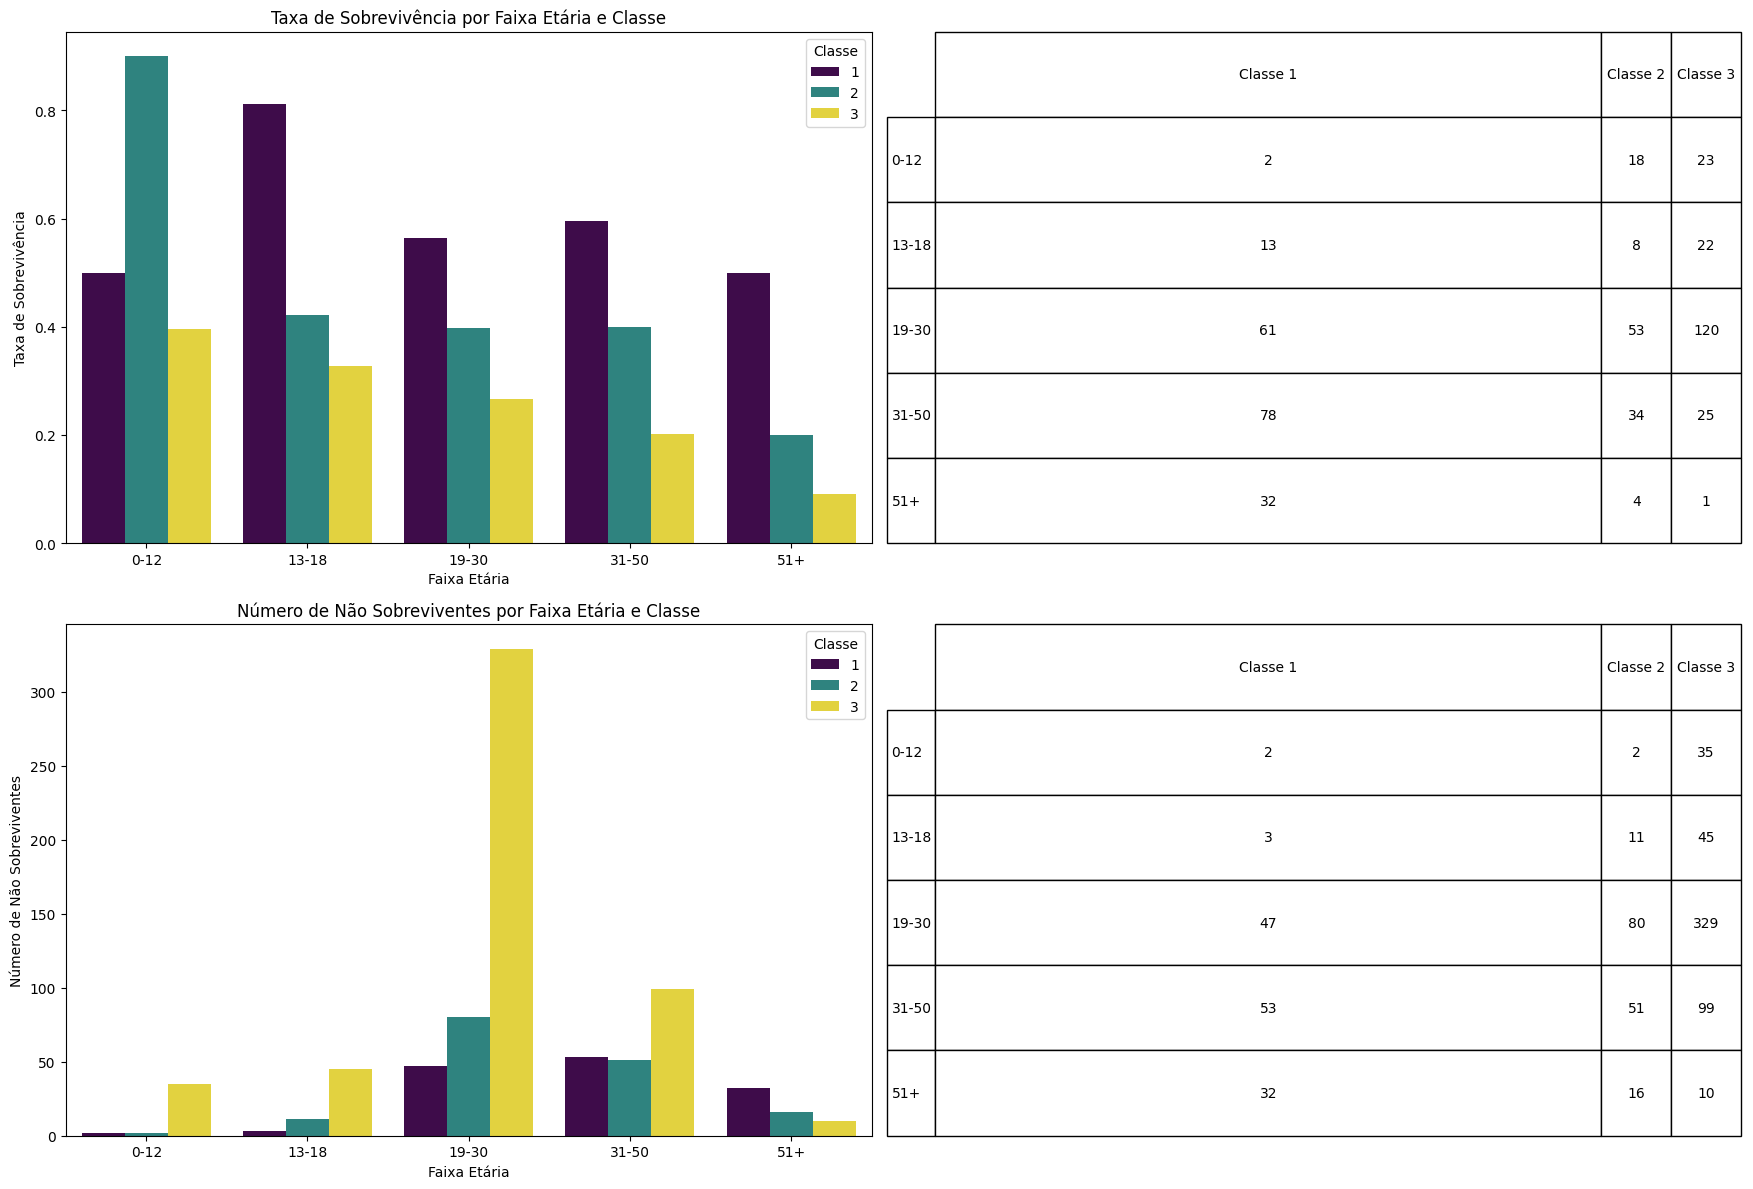

In [28]:

# Criar faixas etárias
bins = [0, 12, 18, 30, 50, 100]
labels = ['0-12', '13-18', '19-30', '31-50', '51+']
df_concat['Age_group'] = pd.cut(df_concat['Age'], bins=bins, labels=labels)

# Preencher valores nulos com a moda
mode_age_group = df_concat['Age_group'].mode()[0]
df_concat['Age_group'].fillna(mode_age_group, inplace=True)

# Calcular a taxa de sobrevivência média por faixa etária e classe
age_class_survival = df_concat.groupby(['Age_group', 'Pclass'])['Survived'].mean().reset_index()

# Calcular o número total de sobreviventes por faixa etária e classe
survivor_count = df_concat[df_concat['Survived'] == 1].groupby(['Age_group', 'Pclass'])['Survived'].count().reset_index(name='Survivors')

# Calcular o número total de não sobreviventes por faixa etária e classe
non_survivor_count = df_concat[df_concat['Survived'] == 0].groupby(['Age_group', 'Pclass'])['Survived'].count().reset_index(name='Non_Survivors')

# Criar a figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico de barras para taxa de sobrevivência
sns.barplot(
    x='Age_group',
    y='Survived',
    hue='Pclass',
    data=age_class_survival,
    palette='viridis',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Taxa de Sobrevivência por Faixa Etária e Classe')
axes[0, 0].set_xlabel('Faixa Etária')
axes[0, 0].set_ylabel('Taxa de Sobrevivência')
axes[0, 0].legend(title='Classe')

# Tabela de sobreviventes
pivot_table_survivors = survivor_count.pivot(index='Age_group', columns='Pclass', values='Survivors').fillna(0).astype(int)
axes[0, 1].axis('off')
table_survivors = axes[0, 1].table(cellText=pivot_table_survivors.values,
                                   colLabels=[f'Classe {col}' for col in pivot_table_survivors.columns],
                                   rowLabels=pivot_table_survivors.index,
                                   cellLoc='center',
                                   loc='center',
                                   bbox=[0, 0, 1, 1],
                                   edges='closed')
table_survivors.auto_set_font_size(False)
table_survivors.set_fontsize(10)
table_survivors.auto_set_column_width(pivot_table_survivors.columns)
for key, cell in table_survivors._cells.items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

# Gráfico de barras para não sobreviventes
sns.barplot(
    x='Age_group',
    y='Non_Survivors',
    hue='Pclass',
    data=non_survivor_count,
    palette='viridis',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Número de Não Sobreviventes por Faixa Etária e Classe')
axes[1, 0].set_xlabel('Faixa Etária')
axes[1, 0].set_ylabel('Número de Não Sobreviventes')
axes[1, 0].legend(title='Classe')

# Tabela de não sobreviventes
pivot_table_non_survivors = non_survivor_count.pivot(index='Age_group', columns='Pclass', values='Non_Survivors').fillna(0).astype(int)
axes[1, 1].axis('off')
table_non_survivors = axes[1, 1].table(cellText=pivot_table_non_survivors.values,
                                       colLabels=[f'Classe {col}' for col in pivot_table_non_survivors.columns],
                                       rowLabels=pivot_table_non_survivors.index,
                                       cellLoc='center',
                                       loc='center',
                                       bbox=[0, 0, 1, 1],
                                       edges='closed')
table_non_survivors.auto_set_font_size(False)
table_non_survivors.set_fontsize(10)
table_non_survivors.auto_set_column_width(pivot_table_non_survivors.columns)
for key, cell in table_non_survivors._cells.items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

plt.tight_layout()
plt.show()


In [29]:
# Verificar valores nulos na coluna 'Age_group' antes do preenchimento
null_values_before = df_concat['Age_group'].isnull().sum()
print(f'Número de valores nulos na coluna Age_group antes do preenchimento: {null_values_before}')

Número de valores nulos na coluna Age_group antes do preenchimento: 0


/tmp/ipykernel_2150/1129542623.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Count', hue='Sex', data=survivor_counts, ci=None, ax=ax1)


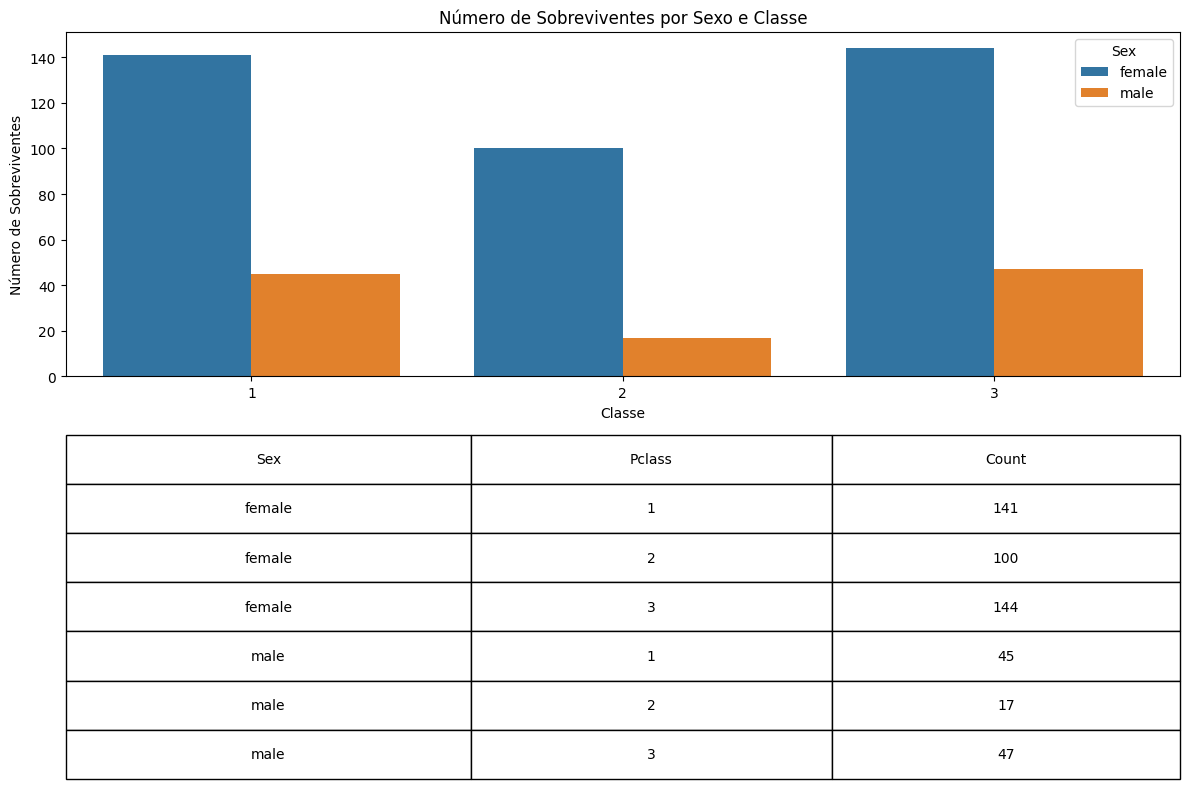

In [30]:
# Filtrar apenas os sobreviventes
survivors_df = df_concat[df_concat['Survived'] == 1]

# Contar o número de sobreviventes por sexo e classe
survivor_counts = survivors_df.groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Subplot para o gráfico
ax1 = plt.subplot2grid((2, 1), (0, 0))

sns.barplot(x='Pclass', y='Count', hue='Sex', data=survivor_counts, ci=None, ax=ax1)
ax1.set_title('Número de Sobreviventes por Sexo e Classe')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Número de Sobreviventes')

# Subplot para a tabela
ax2 = plt.subplot2grid((2, 1), (1, 0))

# Ocultar eixos da tabela
ax2.axis('off')

# Adicionar a tabela
table = ax2.table(cellText=survivor_counts.values,
                  colLabels=survivor_counts.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])

# Ajustar o tamanho da tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])

plt.tight_layout()
plt.show()


   Pclass  count       mean        std  min      25%      50%       75%  \
0       1  323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625   
1       2  277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   
2       3  709.0  13.304513  11.486319  0.0   7.7500   8.0500   15.2458   

        max  
0  512.3292  
1   73.5000  
2   69.5500  


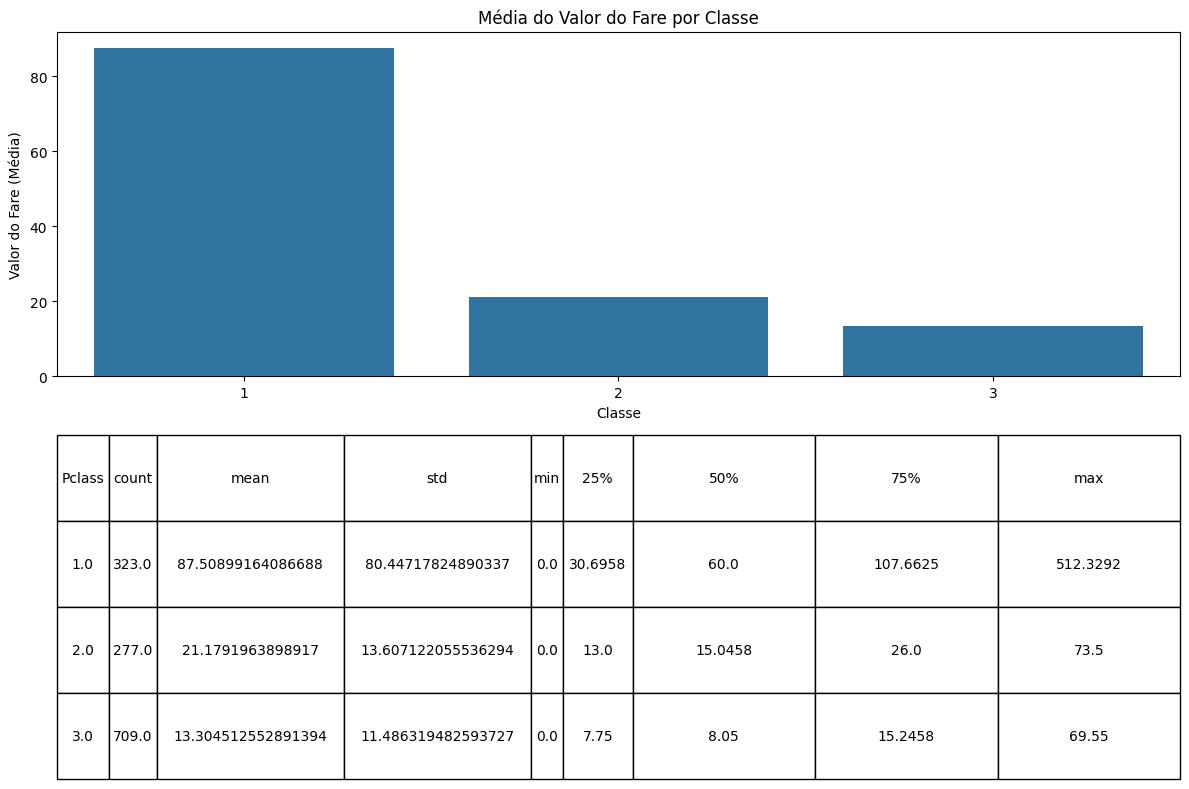

In [31]:
df_concat['Ticket'] = pd.to_numeric(df_concat['Fare'], errors='coerce')

# Calcular estatísticas descritivas do valor do ticket por classe
ticket_stats = df_concat.groupby('Pclass')['Fare'].describe().reset_index()

# Mostrar as estatísticas calculadas
print(ticket_stats)

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Subplot para o gráfico
ax1 = plt.subplot2grid((2, 1), (0, 0))

# Gráfico de barras para a média do valor do ticket por classe
mean_ticket = df_concat.groupby('Pclass')['Fare'].mean().reset_index()
sns.barplot(x='Pclass', y='Fare', data=mean_ticket, errorbar=None, ax=ax1)
ax1.set_title('Média do Valor do Fare por Classe')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Valor do Fare (Média)')

# Subplot para a tabela
ax2 = plt.subplot2grid((2, 1), (1, 0))

# Ocultar eixos da tabela
ax2.axis('off')

# Adicionar a tabela com estatísticas
table = ax2.table(cellText=ticket_stats.values,
                  colLabels=ticket_stats.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])

# Ajustar o tamanho da tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()


## Interpretação Geral

### Variação dos Valores dos Tickets:

- Os valores dos tickets são mais altos nas classes superiores (Classe 1) em comparação com as classes inferiores (Classe 2 e 3).

- O desvio padrão maior na Classe 1 indica que há uma grande variação nos preços, com alguns tickets sendo muito mais caros.
Preços Médios e Extremidades:

- A média dos tickets aumenta à medida que a classe aumenta, mas a Classe 3, apesar de ter a média mais baixa, tem uma ampla gama de valores, refletida pela grande diferença entre o valor mínimo e o máximo.
- A presença de valores mínimos como $0.00 pode indicar que alguns valores de tickets estão faltando ou foram registrados incorretamente.

#### Distribuição dos Tickets:

* Em Classe 1, há uma ampla gama de preços, refletida pelos valores dos quartis e o alto máximo.
* Em Classe 2, os tickets são mais homogêneos, com menos variação nos preços.
* Em Classe 3, a maioria dos tickets é bastante barata, com a mediana e os quartis indicando que a maioria dos tickets tem um valor relativamente baixo.
#### Essas estatísticas ajudam a entender como o preço dos tickets varia entre as diferentes classes no Titanic e podem fornecer insights sobre a acessibilidade e o nível de conforto associado a cada classe. 

### 3.1. Boxplot da Idade dos Sobreviventes e Não Sobreviventes
Este gráfico mostrará a distribuição da idade para aqueles que sobreviveram e para aqueles que não sobreviveram.

/tmp/ipykernel_2150/3645633007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


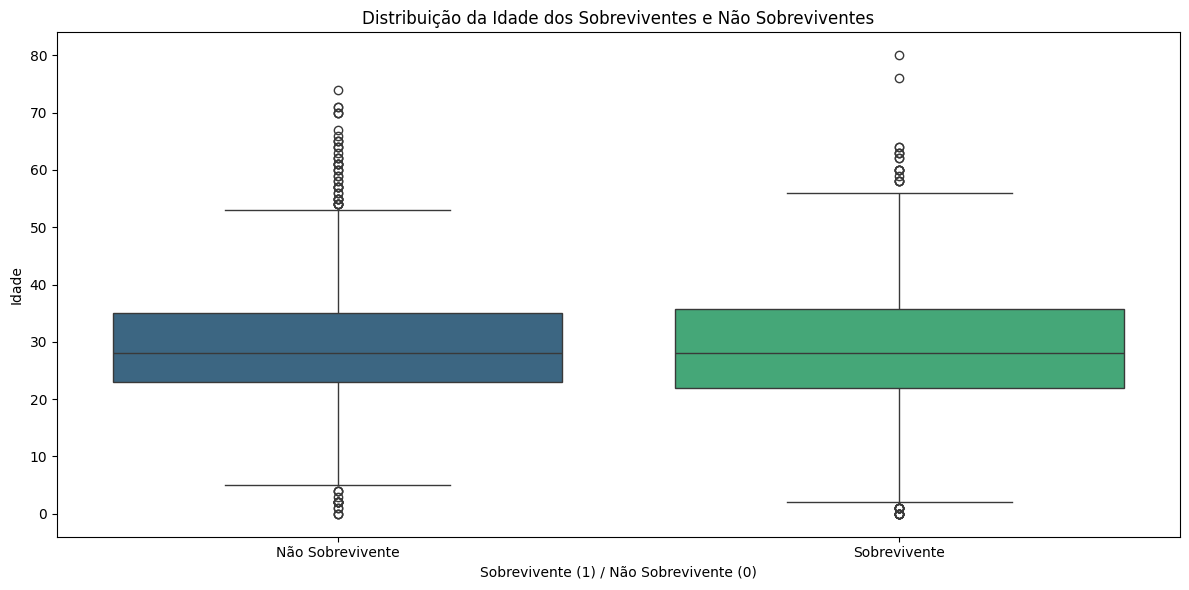

In [32]:
# Boxplot da idade dos sobreviventes e não sobreviventes
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Survived',
    y='Age',
    data=df_concat,
    palette='viridis'
)

plt.title('Distribuição da Idade dos Sobreviventes e Não Sobreviventes')
plt.xlabel('Sobrevivente (1) / Não Sobrevivente (0)')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Não Sobrevivente', 'Sobrevivente'])
plt.tight_layout()

plt.show()

### 3.1.1 Boxplot da Idade por Sexo
Este gráfico mostrará a distribuição da idade separada por sexo, independentemente de terem sobrevivido ou não.

/tmp/ipykernel_2150/1631964892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


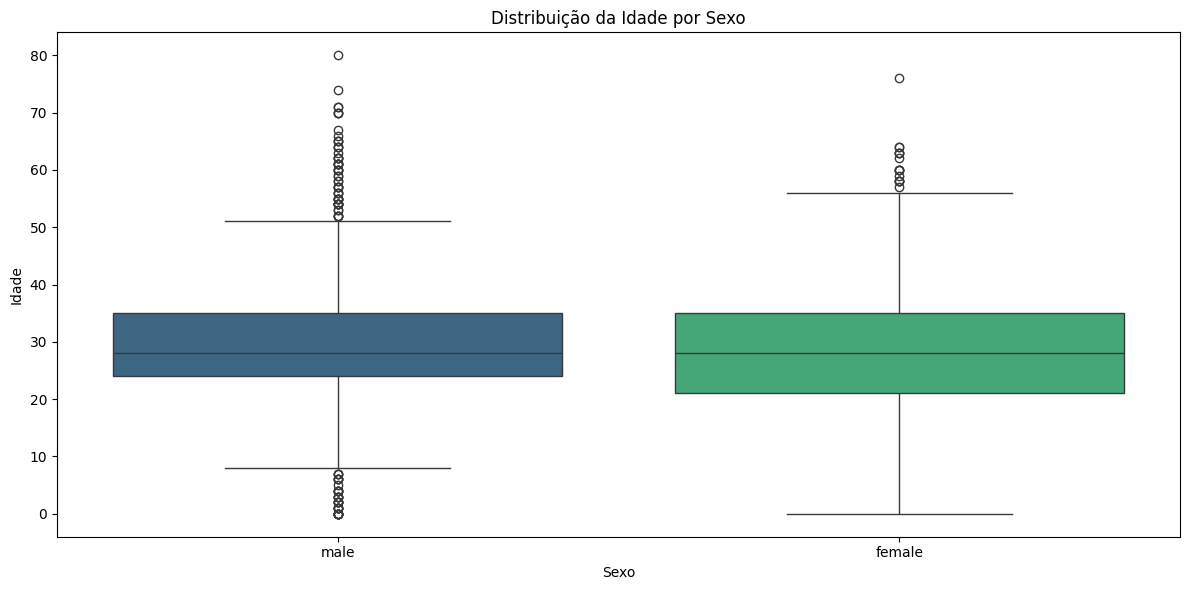

In [33]:
# Boxplot da idade por sexo
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Sex',
    y='Age',
    data=df_concat,
    palette='viridis'
)

plt.title('Distribuição da Idade por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.tight_layout()

plt.show()

### 3.1.2. Boxplot da Idade dos Sobreviventes por Sexo
Este gráfico mostrará a distribuição da idade para os sobreviventes, separados por sexo.

/tmp/ipykernel_2150/2011630548.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


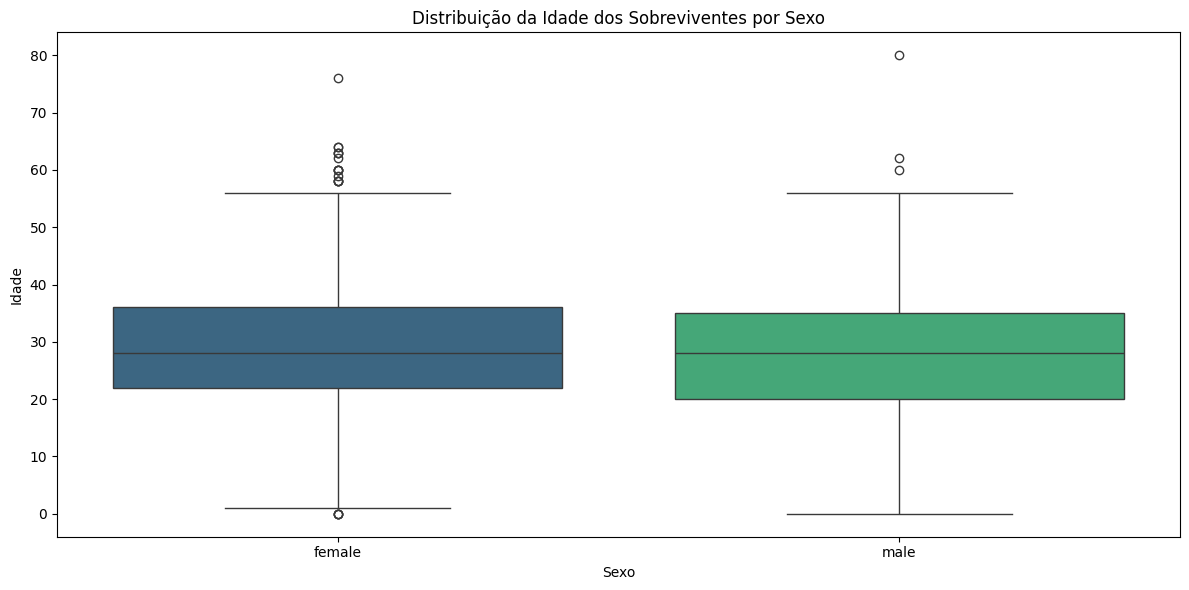

In [34]:
# Filtrar os sobreviventes
survivors = df_concat[df_concat['Survived'] == 1]

plt.figure(figsize=(12, 6))

# Boxplot da idade dos sobreviventes por sexo
sns.boxplot(
    x='Sex',
    y='Age',
    data=survivors,
    palette='viridis'
)

plt.title('Distribuição da Idade dos Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.tight_layout()

plt.show()

### 3.1.3. Boxplot da Idade dos Não Sobreviventes por Sexo
Este gráfico mostrará a distribuição da idade para os não sobreviventes, separados por sexo.

/tmp/ipykernel_2150/1351803175.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


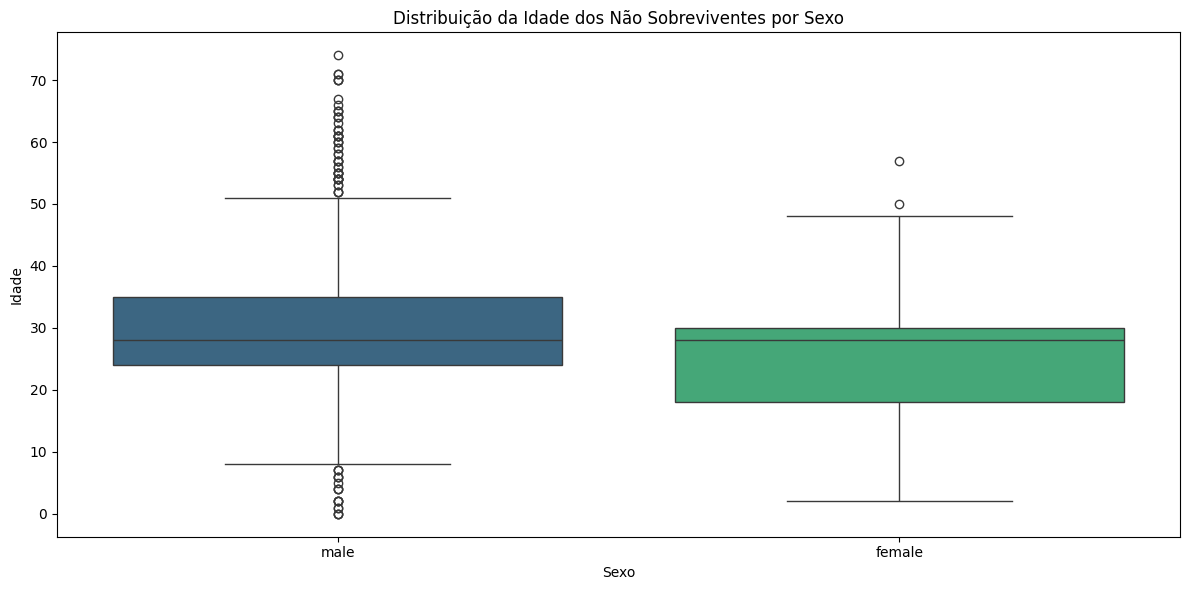

In [35]:
# Filtrar os não sobreviventes
non_survivors = df_concat[df_concat['Survived'] == 0]

plt.figure(figsize=(12, 6))

# Boxplot da idade dos não sobreviventes por sexo
sns.boxplot(
    x='Sex',
    y='Age',
    data=non_survivors,
    palette='viridis'
)

plt.title('Distribuição da Idade dos Não Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.tight_layout()

plt.show()

### 4. Feature Engineering

* ### Padronização: Transforma os dados para uma média de 0 e desvio padrão de 1. Útil quando queremos dados centrados em torno de 0 e com variabilidade em uma escala comum.
* ### Normalização: Transforma os dados para um intervalo específico (0 a 1). Útil para escalas relativas e quando queremos que todos os valores estejam dentro de um intervalo fixo.

Resumo das Transformações:
Sem Escala (Original):

Valores de Fare têm uma ampla gama e podem incluir valores extremos. A distribuição pode ser assimétrica, afetando a performance de alguns algoritmos de machine learning.
Com Escala (Transformado):

Padronização (Standardization): Ajusta a variável para uma média de 0 e desvio padrão de 1. Facilita a comparação com outras variáveis e pode melhorar o desempenho de modelos que assumem normalidade nos dados.
Normalização (Min-Max Scaling): Ajusta os valores para um intervalo fixo, geralmente [0, 1]. É útil quando os algoritmos são sensíveis ao intervalo das variáveis ou quando é necessário manter a proporção original dos valores.

## 4.1 Exploração dos Dados

In [36]:
# Obter uma visão geral das colunas e tipos de dados
print(df_concat.info())

# Estatísticas descritivas das colunas numéricas
print(df_concat.describe())

# Verificar a distribuição da variável alvo
print(df_concat['Survived'].value_counts())

# Verificar a distribuição dos dados em colunas categóricas
print(df_concat['Sex'].value_counts())
print(df_concat['Embarked'].value_counts())
print(df_concat['Age_group'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     1309 non-null   int64   
 1   Name       1309 non-null   object  
 2   Sex        1309 non-null   object  
 3   Age        1309 non-null   int64   
 4   SibSp      1309 non-null   int64   
 5   Parch      1309 non-null   int64   
 6   Ticket     1309 non-null   float64 
 7   Fare       1309 non-null   float64 
 8   Embarked   1309 non-null   object  
 9   Survived   1309 non-null   int64   
 10  Age_group  1309 non-null   category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 103.9+ KB
None
            Pclass          Age        SibSp        Parch       Ticket  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882    29.484339     0.498854     0.385027    33.281086   
std       0.837836    12.916721     1.041658     0.86556

## 4.2 Preprocessamento dos Dados

In [37]:
# Excluir colunas que não serão usadas para modelagem
df_concat = df_concat.drop(columns=['Name', 'Ticket','Age'])

df_concat.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,Age_group
0,3,male,0,0,7.8292,Q,0,31-50
1,3,female,1,0,7.0000,S,1,31-50
2,2,male,0,0,9.6875,Q,0,51+
3,3,male,0,0,8.6625,S,0,19-30
4,3,female,1,1,12.2875,S,1,19-30


<Axes: >

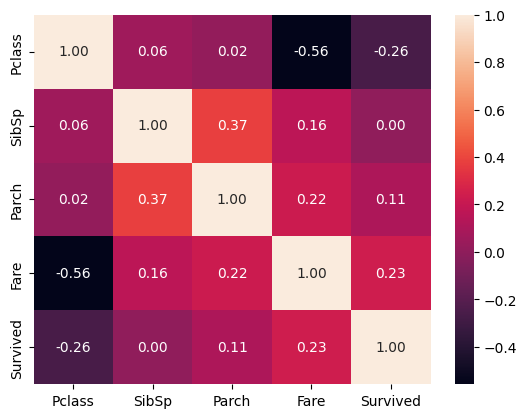

In [38]:
df_heatmap=df_concat[["Pclass", "SibSp", "Parch", "Fare", "Survived"]].corr()
sns.heatmap(df_heatmap, annot=True, fmt= ".2f")

In [39]:
df_concat.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,Age_group
0,3,male,0,0,7.8292,Q,0,31-50
1,3,female,1,0,7.0000,S,1,31-50
2,2,male,0,0,9.6875,Q,0,51+
3,3,male,0,0,8.6625,S,0,19-30
4,3,female,1,1,12.2875,S,1,19-30


In [ ]:
agrupamento = df_concat.groupby(['Pclass', 'Survived']).agg(Count=('Pclass', 'size')).reset_index()

print(agrupamento)


   Pclass  Survived  Count
0       1         0    137
1       1         1    186
2       2         0    160
3       2         1    117
4       3         0    518
5       3         1    191


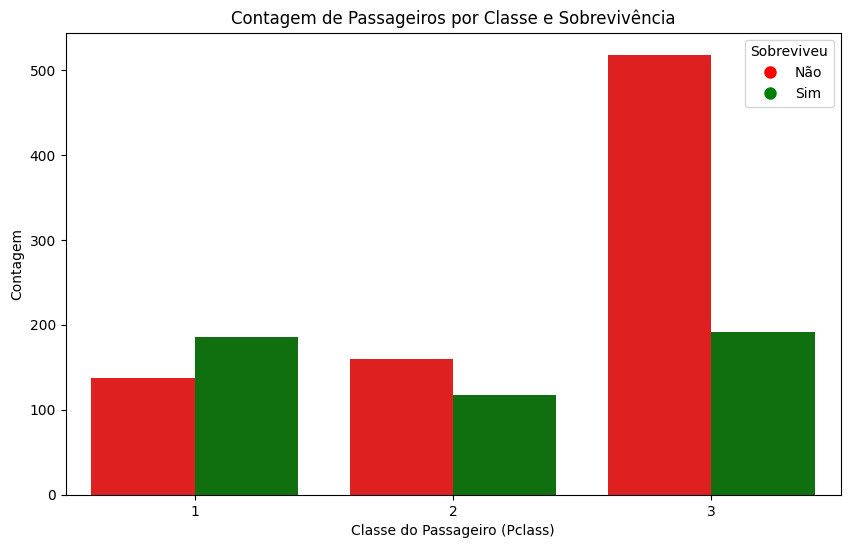

In [41]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df_concat, x='Pclass', hue='Survived', palette={0: 'red', 1: 'green'})

plt.title('Contagem de Passageiros por Classe e Sobrevivência')
plt.xlabel('Classe do Passageiro (Pclass)')
plt.ylabel('Contagem')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)]
plt.legend(handles=handles, title='Sobreviveu', labels=['Não', 'Sim'], loc='upper right')

plt.xticks(rotation=0)
plt.show()


In [ ]:
agrupamento1 = df_concat.groupby(['Pclass', 'SibSp']).agg(Count=('Pclass', 'size')).reset_index()

print(agrupamento1)


    Pclass  SibSp  Count
0        1      0    198
1        1      1    113
2        1      2      8
3        1      3      4
4        2      0    182
5        2      1     82
6        2      2     12
7        2      3      1
8        3      0    511
9        3      1    124
10       3      2     22
11       3      3     15
12       3      4     22
13       3      5      6
14       3      8      9


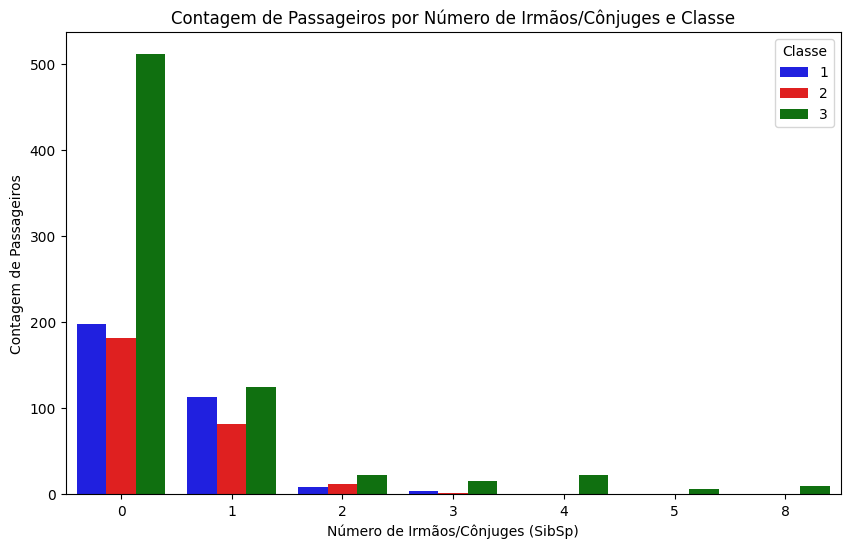

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agrupamento1, x='SibSp', y='Count', hue='Pclass',palette=['blue', 'red', 'green'])

plt.title('Contagem de Passageiros por Número de Irmãos/Cônjuges e Classe')
plt.xlabel('Número de Irmãos/Cônjuges (SibSp)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Classe')
plt.show()

In [44]:
agrupamento2 = df_concat.groupby(['Pclass', 'Parch']).agg(Count=('Pclass', 'size')).reset_index()

print(agrupamento2)

    Pclass  Parch  Count
0        1      0    242
1        1      1     50
2        1      2     27
3        1      3      2
4        1      4      2
5        2      0    206
6        2      1     43
7        2      2     25
8        2      3      3
9        3      0    554
10       3      1     77
11       3      2     61
12       3      3      3
13       3      4      4
14       3      5      6
15       3      6      2
16       3      9      2


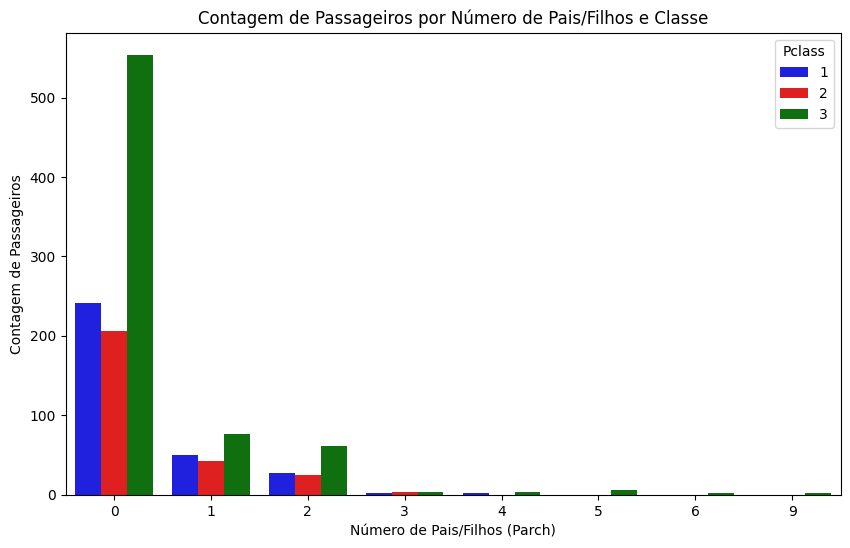

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agrupamento2, x='Parch', y='Count', hue='Pclass', palette=['blue', 'red', 'green'])

plt.title('Contagem de Passageiros por Número de Pais/Filhos e Classe')
plt.xlabel('Número de Pais/Filhos (Parch)')
plt.ylabel('Contagem de Passageiros')
plt.show()


In [46]:
df_concat.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived',
       'Age_group'],
      dtype='object')

In [47]:
# Converter 'Sex' para variável binária
df_concat['Sex'] = df_concat['Sex'].map({'male': 0, 'female': 1})

In [48]:
# Converter 'Embarked' para variáveis dummy (one-hot encoding)
df_final = pd.get_dummies(df_concat, columns=['Embarked','Age_group', 'Parch', 'Pclass'], drop_first=True)

df_final.drop(columns=['SibSp'], inplace=True)
df_final.head()

,Sex,Fare,Survived,Embarked_Q,Embarked_S,Age_group_13-18,Age_group_19-30,Age_group_31-50,Age_group_51+,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Pclass_2,Pclass_3
0,0,7.8292,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,7.0000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,9.6875,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,8.6625,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,12.2875,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1


In [49]:
df_final.columns

Index(['Sex', 'Fare', 'Survived', 'Embarked_Q', 'Embarked_S',
       'Age_group_13-18', 'Age_group_19-30', 'Age_group_31-50',
       'Age_group_51+', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Parch_9', 'Pclass_2', 'Pclass_3'],
      dtype='object')

## 4.3 Separação dos dados para treino e teste

In [ ]:
# Separando as features e o target
X = df_final.drop('Survived', axis=1)  # Features (todas as colunas, exceto 'Survived') são as informações que usamos para prever.
y = df_final['Survived']  # Target (a coluna 'Survived') é o resultado que queremos prever. 

# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 17), (393, 17), (916,), (393,))

## 4.4 Normalização dos dados

In [51]:
# Normalizando os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Dados normalizados (Min-Max):")
print(X_train_scaled)

Dados normalizados (Min-Max):
     Sex      Fare  Embarked_Q  Embarked_S  Age_group_13-18  Age_group_19-30  \
0    1.0  0.050610         0.0         1.0              0.0              0.0   
1    1.0  0.050749         0.0         1.0              0.0              0.0   
2    0.0  0.015127         1.0         0.0              0.0              0.0   
3    0.0  0.015216         0.0         1.0              0.0              1.0   
4    1.0  0.038061         0.0         1.0              1.0              0.0   
..   ...       ...         ...         ...              ...              ...   
911  1.0  0.019210         0.0         1.0              1.0              0.0   
912  0.0  0.101497         0.0         1.0              0.0              0.0   
913  0.0  0.019218         0.0         1.0              0.0              1.0   
914  0.0  0.015176         0.0         1.0              0.0              1.0   
915  1.0  0.295806         0.0         1.0              0.0              1.0   

     Age_

# colocar texto de normalização nesta parte

## 4.5 Modelagem
Treinamento e Avaliação com Regressão Logística

In [52]:
# Importando as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializando o modelo de regressão logística
logistic_model = LogisticRegression(random_state = 42, max_iter=1000)

# Treinando o modelo com os dados de treino
logistic_model.fit(X_train_scaled, y_train)

# Fazendo previsões com os dados de teste
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Avaliando o modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Exibindo os resultados
print(f"Acurácia Regressão Logística: {accuracy_logistic}")
print("\n")
print(f"Relatório de Classificação:\n\n{class_report_logistic}")
print("\n")
print(f"Matriz de Confusão:\n{conf_matrix_logistic}")
print("\n")

Acurácia Regressão Logística: 0.8651399491094147


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       248
           1       0.84      0.79      0.81       145

    accuracy                           0.87       393
   macro avg       0.86      0.85      0.85       393
weighted avg       0.86      0.87      0.86       393



Matriz de Confusão:
[[226  22]
 [ 31 114]]




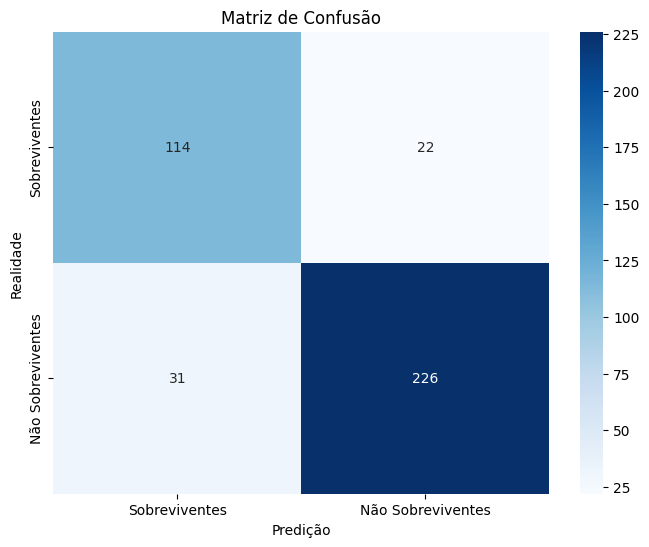

In [53]:
# Valores da matriz de confusão
VP = 114  # Verdadeiros Positivos
VN = 226  # Verdadeiros Negativos
FP = 22   # Falsos Positivos
FN = 31   # Falsos Negativos

# Criar a matriz de confusão
confusion_matrix = np.array([[VP, FP],
                              [FN, VN]])

# Configuração do gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Sobreviventes', 'Não Sobreviventes'],
             yticklabels=['Sobreviventes', 'Não Sobreviventes'])

# Adicionar títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Realidade')
plt.show()


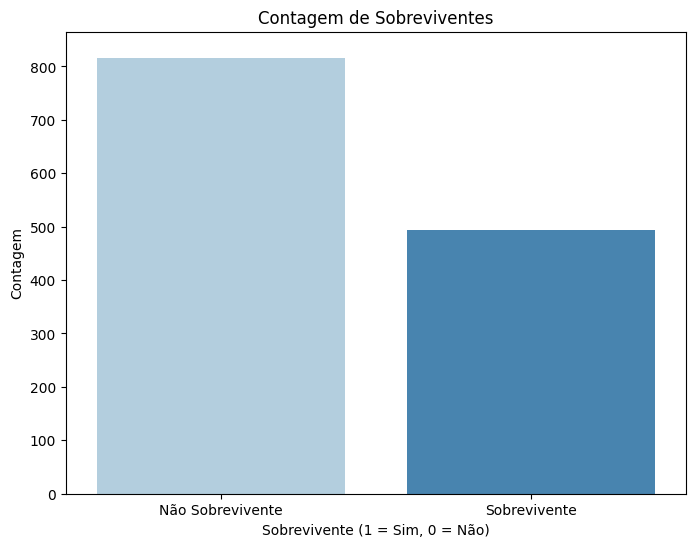

In [54]:
# Configuração do gráfico
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x='Survived', palette='Blues', hue='Survived', legend=False)

# Adicionar títulos e rótulos
plt.title('Contagem de Sobreviventes')
plt.xlabel('Sobrevivente (1 = Sim, 0 = Não)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Sobrevivente', 'Sobrevivente'])  # Ajustar os rótulos do eixo x
plt.ylim(0, df_final['Survived'].value_counts().max() + 50)  # Ajustar limite do eixo y
plt.show()

## 4.6 validação cruzada 

In [55]:
# Importando bibliotecas necessárias
from sklearn.model_selection import cross_val_score

# Inicializando o modelo de regressão logística
logistic_model = LogisticRegression(max_iter=1000)

# Aplicando a validação cruzada
cv_scores_logistic = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Resultados da validação cruzada
print(f"Acurácias em cada fold (Regressão Logística): {cv_scores_logistic}")
print(f"Acurácia Média (Regressão Logística): {cv_scores_logistic.mean():.4f}")
print(f"Desvio Padrão (Regressão Logística): {cv_scores_logistic.std():.4f}")

Acurácias em cada fold (Regressão Logística): [0.83695652 0.86885246 0.8852459  0.80874317 0.84699454]
Acurácia Média (Regressão Logística): 0.8494
Desvio Padrão (Regressão Logística): 0.0264


In [56]:
# 1. Origem
print("Origem do Conjunto de Dados: Titanic, RMS Titanic (1912)")

# 2. Tipo de Dados
print("\nTipo de Dados:")
print(df_concat.dtypes)

# 3. Tamanho
print("\nTamanho do Conjunto de Dados:")
print(f"Número de entradas: {df_concat.shape[0]}")
print(f"Número de colunas: {df_concat.shape[1]}")

# Exibir as primeiras linhas do dataset para uma visualização rápida
print("\nExibição das primeiras linhas do dataset:")
print(df_concat.head())

Origem do Conjunto de Dados: Titanic, RMS Titanic (1912)

Tipo de Dados:
Pclass          int64
Sex             int64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Survived        int64
Age_group    category
dtype: object

Tamanho do Conjunto de Dados:
Número de entradas: 1309
Número de colunas: 8

Exibição das primeiras linhas do dataset:
   Pclass  Sex  SibSp  Parch     Fare Embarked  Survived Age_group
0       3    0      0      0   7.8292        Q         0     31-50
1       3    1      1      0   7.0000        S         1     31-50
2       2    0      0      0   9.6875        Q         0       51+
3       3    0      0      0   8.6625        S         0     19-30
4       3    1      1      1  12.2875        S         1     19-30
